# Python Basic Data Vis (LAB 2 & 3)

## Author: Sarah Chambers

### 1. Write a program to find the mean, median, mode, the quantiles, etc. and plot them.

testing stats.py...
the mean of [1,2,3,4,5] is 3.0
the median of [2,5,4,3,1] is 3
the median of [2,5,4,3] is 3.5
the variance of [2,5,4,3] is 1.25
the standard deviation of [2,5,4,3] is 1.118033988749895
the mode of [1, 2, 3, 4, 3, 2, 3, 1, 2, 1, 1, 2, 3, 2] is [2]
the 20th percentile of [1, 2, 3, 4, 3, 2, 3, 1, 2, 1, 1, 2, 3, 2] is 1
the IQR of [1, 2, 3, 4, 3, 2, 3, 1, 2, 1, 1, 2, 3, 2] is 2
             Temperature         RH         Ws      Rain
Classes                                                 
fire           33.090909  63.272727  15.672727  0.014545
fire           32.000000  60.500000  13.500000  0.000000
fire           28.000000  77.000000  17.000000  0.000000
not fire       29.156250  71.312500  16.156250  2.221875
not fire       31.714286  71.285714  17.285714  0.542857
not fire       29.272727  74.000000  16.909091  1.700000
not fire       29.769231  72.538462  15.769231  0.646154


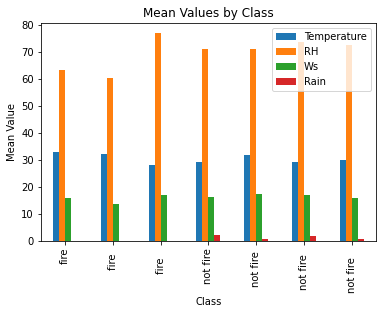

In [5]:
import pandas as pd
df = pd.read_csv("Bejaia Region Dataset.csv")

# Need to import all of my libraries
import math 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from collections import Counter

def mean(x):
    """calculate and return the mean of a numpy array"""
    sum = 0
    for i in range(len(x)):
        sum += x[i]
    return sum/len(x)

def median(x):
    """return the 'middle value' of the array x after sorting"""
    tmp = sorted(x)
    # use // for integer division (i.e. round down)
    return tmp[len(x) // 2] if len(x) % 2 == 1 else (tmp[len(x) // 2] + tmp[(len(x) // 2)-1]) / 2

def mode(xs):
    counts = Counter(xs)
    return np.array([x[0] for x in counts.items() if x[1] == max(counts.values())])

def quantile(xs, q):
    """generalize the median to the q-percent quantile -- q is a float in range (0,1)"""
    tmp = sorted(xs)
    return tmp[ int(len(tmp) * q) ]

def interquartile_range(xs):
    """return difference of the 25% quantile and 75% quantile"""
    return quantile(xs, 0.75) - quantile(xs, 0.25)

def spread(x):
    """one way to measure the spread of data"""
    return max(x) - min(x)

def center(xs):
    return np.array([x - mean(xs) for x in xs])

def var(xs):
    """return variance of x -- the average squared distance from the mean"""
    return mean([x**2 for x in center(xs)])
    # return sum([x**2 for x in center(xs)])/(len(xs) - 1)

def std(xs):
    return math.sqrt(var(xs))

def cov(xs, ys):
    """Take two lists of observations and compute their covariance"""
    assert len(xs) == len(ys)
    cx = center(xs)
    cy = center(ys)
    return mean([cx[i]*cy[i] for i in range(len(cx))])

def correlation(xs, ys):
    """Calculate the (Pearson) correlation coefficient"""
    return cov(xs,ys)/(std(xs)*std(ys))

if __name__ == '__main__':
    print('testing stats.py...')
    
    print(f'the mean of [1,2,3,4,5] is {mean(np.array([1,2,3,4,5]))}')
    # assert(mean(np.array([1,2,3,4,5])) == 3.5)
    print(f'the median of [2,5,4,3,1] is {median([2,5,4,3,1])}')
    print(f'the median of [2,5,4,3] is {median([2,5,4,3])}')
    print(f'the variance of [2,5,4,3] is {var([2,5,4,3])}')
    print(f'the standard deviation of [2,5,4,3] is {std([2,5,4,3])}')
    print(f'the mode of {[1,2,3,4,3,2,3,1,2,1,1,2,3,2]} is {mode([1,2,3,4,3,2,3,1,2,1,1,2,3,2])}')
    print(f'the 20th percentile of {[1,2,3,4,3,2,3,1,2,1,1,2,3,2]} is {quantile([1,2,3,4,3,2,3,1,2,1,1,2,3,2], 0.2)}')
    print(f'the IQR of {[1,2,3,4,3,2,3,1,2,1,1,2,3,2]} is {interquartile_range([1,2,3,4,3,2,3,1,2,1,1,2,3,2])}')
    
# 1a.
means = df.groupby("Classes").mean()[["Temperature","RH","Ws","Rain"]]
print(means)

# 1b. Draw a bar figure to show the mean values of these attributes for each class
means.plot(kind='bar')

# Labels & Title
plt.xlabel("Class")
plt.ylabel("Mean Value")
plt.title("Mean Values by Class")

plt.show()

### 2. Using the "Sidi..." calculate and show the median vals of the four attributes 

FFMC    84.85
DMC     13.15
DC      31.50
ISI      4.60
dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

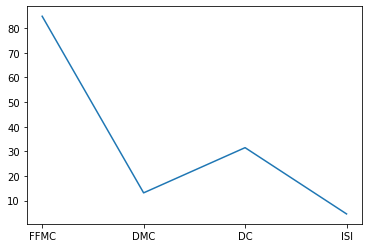

In [6]:
df = pd.read_csv("Sidi-Bel Abbes Region Dataset.csv")

medians = df[['FFMC', 'DMC', 'DC', 'ISI']].median()

print(medians)

plt.plot(medians)
plt.show

### 3. Using the "Bejaia..." (the Bejaia data set) calculate and show the 25, 60, and 75th percent quartiles of Temperature, RH, Ws, and Rain

In [7]:
df = pd.read_csv("Bejaia Region Dataset.csv")

print("The 25th quartile for Temperature is: " , quantile(df['Temperature'], 0.25))
print("The 60th quartile for Temperature is: " , {quantile(df['Temperature'], 0.60)})
print("The 75th quartile for Temperature is: ", {quantile(df['Temperature'], 0.75)})

print("The 25th quartile for RH is: " , quantile(df['RH'], 0.25))
print("The 60th quartile for RH is: " , quantile(df['RH'], 0.60))
print("The 75th quartile for RH is: " , quantile(df['RH'], 0.75))

print("The 25th quartile for Ws is: " , quantile(df['Ws'], 0.25))
print("The 60th quartile for Ws is: " , quantile(df['Ws'], 0.60))
print("The 75th quartile for Ws is: " , quantile(df['Ws'], 0.75))

print("The 25th quartile for Rain is: " , quantile(df['Rain'], 0.25))
print("The 60th quartile for Rain is: "  , quantile(df['Rain'], 0.60))
print("The 75th quartile for Rain is: " , quantile(df['Rain'], 0.75))

The 25th quartile for Temperature is:  29
The 60th quartile for Temperature is:  {32}
The 75th quartile for Temperature is:  {34}
The 25th quartile for RH is:  60
The 60th quartile for RH is:  73
The 75th quartile for RH is:  78
The 25th quartile for Ws is:  14
The 60th quartile for Ws is:  17
The 75th quartile for Ws is:  18
The 25th quartile for Rain is:  0.0
The 60th quartile for Rain is:  0.1
The 75th quartile for Rain is:  0.5


### 4. Using the "Sidi..." (the Sidi data set) calculate and show the standard deviation of the following Temperature, Rain, BUI, FWI

Temperature     3.675608
Rain            1.486759
BUI            13.870785
FWI             8.137424
dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

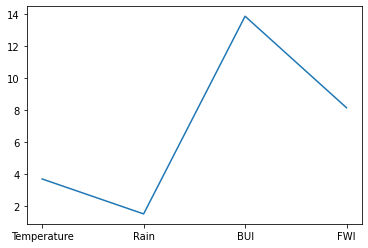

In [8]:
df = pd.read_csv("Sidi-Bel Abbes Region Dataset.csv")

stdev = df[['Temperature', 'Rain', 'BUI', 'FWI']].std()

print(stdev)

plt.plot(stdev)
plt.show

### 5. Find the correlation between 2 attributes using the "Bejaia..." data set

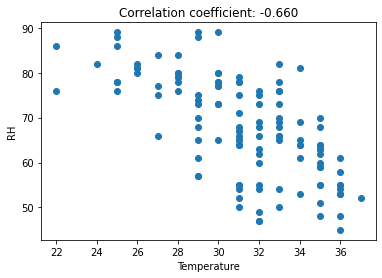

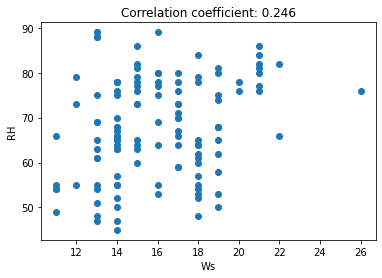

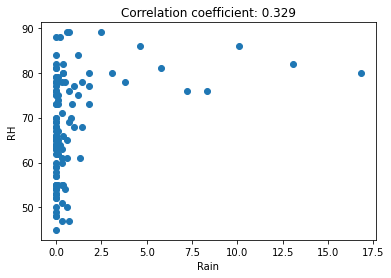

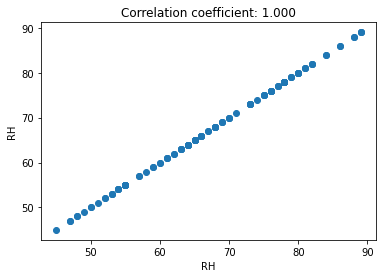

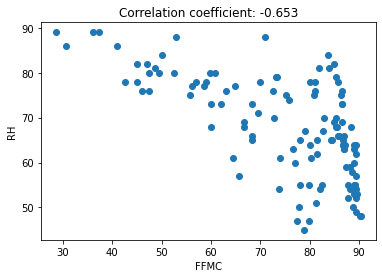

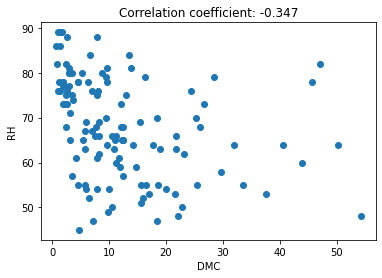

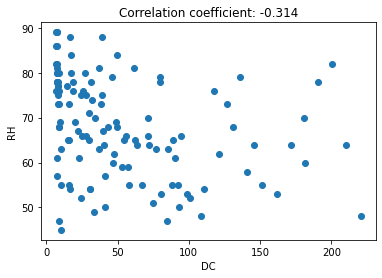

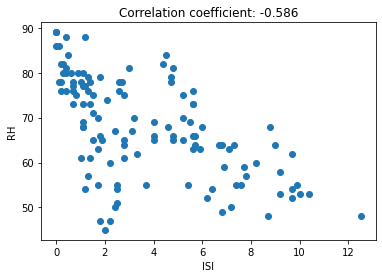

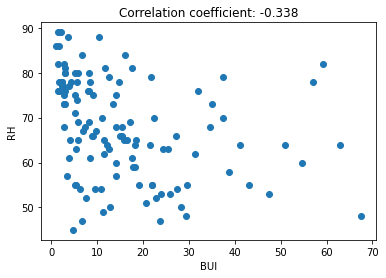

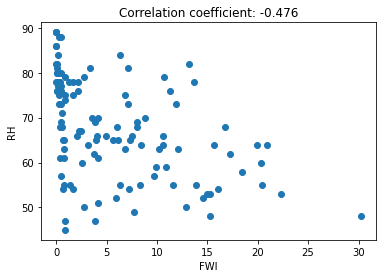

In [9]:
import math 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from collections import Counter

# Load the Bejaia Region Dataset
df = pd.read_csv("Bejaia Region Dataset.csv")

# Create scatter plots and calculate correlation coefficients for each pair of variables
attributes = ["Temperature", "Ws", "Rain", "RH", "FFMC", "DMC", "DC", "ISI", "BUI", "FWI"]

for i in attributes:
    plt.scatter(df[i], df["RH"])
    corr_coef = np.corrcoef(df[i], df["RH"])[0, 1]
    plt.title(f"Correlation coefficient: {corr_coef:.3f}")
    plt.xlabel(i)
    plt.ylabel("RH")
    plt.show()

### 6. Draw a line figure to show the temperature change with time for the "Bejaia Region Dataset"

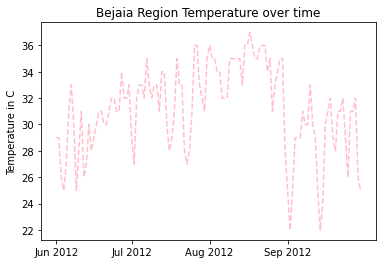

In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# read data 
BejaiaData = pd.read_csv('Bejaia Region Dataset.csv')

tempChange = BejaiaData['Temperature']
time = np.arange(len(tempChange))

plt.plot(time, tempChange, color = 'pink', linestyle = 'dashed')
Xlabel_month_loc = [i for i in time if BejaiaData['day'][i] == 1]
Xlabels = ["Jun 2012", "Jul 2012", "Aug 2012", "Sep 2012"]
plt.xticks(Xlabel_month_loc, Xlabels)
plt.title("Bejaia Region Temperature over time")
plt.ylabel("Temperature in C")
plt.show()

### 7. Draw a scatterplot figure to show the relationship between the temperature and the Fire Weather Index (FWI) for the "Sidi-Bel Abbes Region Dataset"

Text(0.5, 1.0, 'Relationship Between The Temp & FWI for the Sidi-Bel Abbes Dataset')

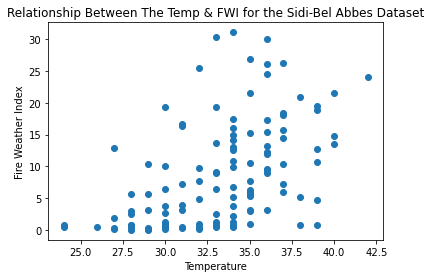

In [11]:
Sidi = pd.read_csv('Sidi-Bel Abbes Region Dataset.csv')

temp = Sidi['Temperature']
FWI = Sidi['FWI']

plt.scatter(temp, FWI)
plt.xlabel('Temperature')
plt.ylabel('Fire Weather Index')
plt.title("Relationship Between The Temp & FWI for the Sidi-Bel Abbes Dataset")

### 8. Draw a histogram to show the average Relative Humidity (RH) for each month for the "Bejaia Region Dataset"

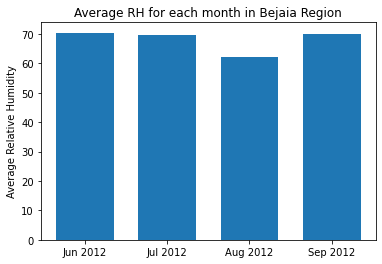

In [12]:
BejaiaData = pd.read_csv('Bejaia Region Dataset.csv')

avgHum = BejaiaData.groupby('month')['RH'].mean()
plt.bar(range(len(avgHum)), avgHum, 
        width = 0.7, align='center')

plt.title("Average RH for each month in Bejaia Region")
plt.ylabel("Average Relative Humidity")
Xlabels = ["Jun 2012", "Jul 2012", "Aug 2012", "Sep 2012"]
plt.xticks(range(len(avgHum)), Xlabels)
plt.show();